<a href="https://colab.research.google.com/github/hazrulshabri/nims/blob/main/250221_c3_250114cal1rx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INITIALIZES LIBRARY

In [1]:
!pip install ipywidgets matplotlib
!pip install scipy
!pip install pandas scikit-learn
!pip install numba==0.56.4

import numba as nb
from numba import njit, jit
from numba import prange

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from scipy.signal import savgol_filter
from google.colab import drive
import numpy as np
import os
import numba as nb
from numba import njit
from numba import prange
import matplotlib.pyplot as plt
import re
import datetime
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import ipywidgets as widgets
from IPython.display import display

drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mounted at /content/drive


# INPUT VALUE

In [47]:
data_dir = '/content/drive/My Drive/NIMSjourney_Hazrul_2.0/MASSBAL_RAW/Hazrul_250114cal1rx1'
#data_dir = '/content/drive/My Drive/NIMSjourney_Hazrul_2.0/MASSBAL_RAW/Hazrul_250114cal1rx1'
#data_dir = '/content/drive/My Drive/NIMSjourney_Hazrul_2.0/MASSBAL_RAW/Hazrul_250114drm800'
peak_location= np.array([[2911, 2925],  #CH4
                         [1382, 1397],  #CO2
                         [582, 597],    #H2
                         [2138, 2150],  #CO
                         [2325, 2335],  #N2
                         [2911, 2925],  #null
                         [2911, 2925]]) #null

peak_location_bg= np.array([[2895, 2910, 2926, 2941],  #CH4
                            [1366, 1381, 1398, 1413],  #CO2
                            [566, 581, 598, 613],    #H2
                            [2122, 2137, 2151, 2166],  #CO
                            [2309, 2324, 2336, 2351],  #N2
                            [2895, 2910, 2926, 2941],  #null
                            [2895, 2910, 2926, 2941]]) #null

peak_location_gauss= np.array([ [2911, 2925],  #CH4
                                [1382, 1397],  #CO2
                                [582, 597],    #H2
                                [2138, 2150],  #CO
                                [2325, 2335],  #N2
                                [2911, 2925],  #null
                                [2911, 2925]]) #null

peak_name=np.array((['CH4', 'CO2', 'H2', 'CO', 'N2', 'null', 'null']))



coeff_multi2=np.array([ [ 4.02684492e+01,  4.89836878e-02,  7.99349953e-03,  7.07109776e-03,
                          6.25429764e-03,  8.58187594e-03,  4.89836878e-02,  4.89836878e-02],
                        [-5.98082669e+01,  5.58291940e-04,  2.22066589e-01,  3.75665771e-03,
                          2.68183644e-02,  3.50822036e-03,  5.58291940e-04,  5.58291940e-04],
                        [-3.56851145e+01, -5.18080300e-04,  1.86414399e-03,  9.03689744e-02,
                          7.78934782e-03,  1.64576885e-02, -5.18080300e-04, -5.18080300e-04],
                        [-1.10747995e+02,  4.48612791e-04, -8.25322373e-03,  1.69609204e-03,
                          6.49534513e-01,  5.18120293e-03,  4.48612791e-04,  4.48612791e-04],
                        [ 4.49877816e+01, -2.72664750e-02, -1.30643573e-01, -6.30615482e-02,
                          -4.49207349e-01,  2.40086759e-01, -2.72664750e-02, -2.72664750e-02],
                        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

coeff_multi=np.array([  [-5.99938339e+00,  2.83802161e-03,  1.40509656e-04, -7.61555352e-05,
                          2.90644883e-04,  5.89459431e-04,  2.83802161e-03,  2.83802161e-03],
                        [-4.52387452e+01,  3.85559493e-05,  1.13435729e-02,  8.95019629e-05,
                          -2.07618021e-04,  3.49629355e-04,  3.85559493e-05,  3.85559493e-05],
                        [-3.14872121e-01,  8.72933297e-05,  2.12148583e-04,  4.06421607e-03,
                          9.64619734e-04,  8.74451470e-04,  8.72933297e-05,  8.72933297e-05],
                        [-4.19748900e+01,  4.44236037e-05, -8.21581407e-05, -4.97038463e-05,
                          4.06446852e-02,  6.87538133e-04,  4.44236037e-05,  4.44236037e-05],
                        [ 2.43175358e+01, -1.68346930e-03, -6.55128322e-03, -2.53041232e-03,
                          -2.76540633e-02,  1.39570300e-02, -1.68346930e-03, -1.68346930e-03],
                        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

cal_value=np.array([[-1.28793183e+03,  2.78982756e-02],  #CH4
                    [-1.60315227e+03,  3.67496159e-02],  #CO2
                    [-1.17417019e+03,  1.23026920e-02],  #H2
                    [-1.88397799e+03,  8.65181627e-02],  #CO
                    [-1.86787574e+03,  1.08959639e-01],  #N2
                    [            0,             0],
                    [            0,             0]])

#cal_two_pos=np.array([[122, 458],  #CH4
#                      [122, 574],  #CO2
#                     [122, 800],    #H2
#                      [122, 683],  #CO
#                     [462, 122],  #N2
#                      [122, 122],  #null
#                      [122, 122]]) #null)

cal_two_pos=np.array([[500, 675],  #CH4
                      [500, 750],  #CO2
                      [500, 250],    #H2
                      [500, 850],  #CO
                      [250, 500],  #N2
                      [122, 122],  #null
                      [122, 122]]) #null)


cal_two_y=np.array([[0, 100],  #CH4
                      [0, 100],  #CO2
                      [0, 100],    #H2
                      [0, 100],  #CO
                      [0, 100],  #N2
                      [0, 100],  #null
                      [0, 100]]) #null)

cal_six_pos=np.array([[1000, 1125, 1250, 1375, 1500, 1625],  #CH4
                      [1000, 1125, 1250, 1375, 1500, 1625],  #CO2
                      [1000, 1125, 1250, 1375, 1500, 1625],    #H2
                      [1000, 1125, 1250, 1375, 1500, 1625],  #CO
                      [1625, 1500, 1375, 1250, 1125,  1000],  #N2
                      [122, 122, 122, 122, 122, 122],  #null
                      [122, 122, 122, 122, 122, 122]]) #null)

cal_six_y=np.array([[0, 5, 10, 15, 20, 25],  #CH4
                     [0, 5, 10, 15, 20, 25],  #CO2
                     [0, 5, 10, 15, 20, 25],    #H2
                     [0, 5, 10, 15, 20, 25],  #CO
                     [100, 80, 60, 40, 20, 0],  #N2
                     [0, 5, 10, 15, 20, 25],  #null
                     [0, 5, 10, 15, 20, 25]]) #null)

cal_250205_y=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 50, 75, 100, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  #CH4
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 50, 75, 100, 125, 0, 0, 0, 0, 0],  #CO2
                       [0, 25, 50, 75, 100, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],    #H2
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 50, 75, 100, 125],  #CO
                       [0, 0, 0, 0, 0, 0, 25, 50, 75, 100, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  #N2
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  #null
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) #null)

cal_250221_250114=np.array([[0, 100, 0, 0, 0],
                            [0, 0, 100, 0, 0],
                            [0, 0, 0, 0, 100],
                            [0, 0, 0, 100, 0],
                            [100, 0, 0, 0, 0],
                            [0, 0,  0,  0,  0],
                            [0, 0,  0,  0,  0]])

# INITILIZES FUNCTION


In [3]:

def integrate_trapezoidal(data_array_sub):
    """
    Integrates the data in the second column of data_array_sub using the trapezoidal rule.

    Args:
        data_array_sub: A 4D NumPy array (m x a x g x d) containing data to integrate.

    Returns:
        A 2D NumPy array (m x a) containing the integration results.
    """

    m = data_array_sub.shape[0]  # Number of datasets
    a = data_array_sub.shape[1]  # Number of peaks

    data_array_tra = np.zeros((m, a), dtype=np.float64)  # Initialize output array

    for i in range(m):  # Loop through each dataset
        for j in range(a):  # Loop through each peak
            # Extract data for the current peak
            peak_data = data_array_sub[i, j, :, 1]  # Second column (data to integrate)

            # Apply trapezoidal rule for integration
            data_array_tra[i, j] = np.trapz(peak_data)

    return data_array_tra

def subtract_matching_data(data_array_peak, reg_array_extract):
    """
    Subtracts data from data_array_peak based on matching positions with reg_array_extract.

    Args:
        data_array_peak: A 4D NumPy array (m x a x f x d) containing peak data.
        reg_array_extract: A 4D NumPy array (m x a x e x d) containing regression data.

    Returns:
        A 4D NumPy array (m x a x g x d) containing subtracted data.
    """

    m = data_array_peak.shape[0]  # Number of datasets
    a = data_array_peak.shape[1]  # Number of peaks
    d = data_array_peak[0, 0].shape[1]  # Number of columns (2)

    # Find maximum g across all datasets and peaks
    max_g = 0
    for i in range(m):
        for j in range(a):
            peak_data = data_array_peak[i, j]
            reg_data = reg_array_extract[i, j]
            matching_indices = np.where(np.isin(peak_data[:, 0], reg_data[:, 0]) & (peak_data[:, 0] != 0))[0]
            max_g = max(max_g, len(matching_indices))

    # Preallocate data_array_sub with zeros and desired shape
    data_array_sub = np.zeros((m, a, max_g, d), dtype=np.float64)

    for i in range(m):  # Loop through each dataset
        for j in range(a):  # Loop through each peak
            peak_data = data_array_peak[i, j]
            reg_data = reg_array_extract[i, j]

            # Find matching positions (non-zero and present in both arrays)
            matching_indices = np.where(np.isin(peak_data[:, 0], reg_data[:, 0]) & (peak_data[:, 0] != 0))[0]

            # Extract data for matching positions
            peak_data_matched = peak_data[matching_indices]
            reg_data_matched = reg_data[np.isin(reg_data[:, 0], peak_data_matched[:, 0])]  # Ensure same order

            # Subtract data
            subtracted_data = peak_data_matched.copy()
            subtracted_data[:, 1] = peak_data_matched[:, 1] - reg_data_matched[:, 1]

            # Store subtracted data in the pre-allocated array
            data_array_sub[i, j, :len(subtracted_data), :] = subtracted_data

    return data_array_sub

def extract_raw_data(all_data_array, peak_location):
    """
    Extracts data from all_data_array based on peak_location.

    Args:
        all_data_array: A 3D NumPy array (m x n x p) containing the raw data.
            m: Number of datasets.
            n: Number of rows.
            p: Number of columns.
        peak_location: A 2D NumPy array (a x 2) containing peak start and end positions.
            a: Number of peaks.
            2: Two columns - start position (column 0) and end position (column 1).

    Returns:
        A 4D NumPy array (m x a x f x 2) containing extracted data.
            m: Number of datasets.
            a: Number of peaks.
            f: Number of rows within each peak range.
            2: Two columns - location (column 0) and extracted data (column 1).
    """

    m = all_data_array.shape[0]  # Number of datasets
    a = peak_location.shape[0]  # Number of peaks

    # Preallocate the output array with maximum possible shape
    max_f = 0  # Maximum number of rows within a peak range
    for i in range(m):
        for j in range(a):
            start_pos = peak_location[j, 0]
            end_pos = peak_location[j, 1]
            indices = np.where(np.logical_and(all_data_array[i, :, 0] >= start_pos, all_data_array[i, :, 0] <= end_pos))[0]
            max_f = max(max_f, len(indices))

    data_array_peak = np.zeros((m, a, max_f, 2), dtype=np.float64)  # Preallocate with zeros and float64 dtype

    for i in range(m):  # Loop through each dataset
        for j in range(a):  # Loop through each peak
            # Get start and end positions for the current peak
            start_pos = peak_location[j, 0]
            end_pos = peak_location[j, 1]

            # Find indices in all_data_array matching the peak range
            indices = np.where(np.logical_and(all_data_array[i, :, 0] >= start_pos, all_data_array[i, :, 0] <= end_pos))[0]

            # Extract location and data for the current peak
            peak_data = all_data_array[i, indices, :2]  # Select location (column 0) and data (column 1)

            # Store peak data into the preallocated array
            data_array_peak[i, j, :len(indices), :] = peak_data

    return data_array_peak  # Return the preallocated array

def linear_regression_extract(data_array_extract):
    """
    Performs linear regression on extracted data and creates an array with continuous x-values.

    Args:
        data_array_extract: A 4D NumPy array (m x a x c x d) containing extracted data.
            m: Number of datasets.
            a: Number of peaks.
            c: Number of data points within each peak range.
            d: Two columns - location (column 0) and extracted data (column 1).

    Returns:
        A 4D NumPy array (m x a x e x d) containing regression results.
            m, a, d: Same as in data_array_extract.
            e: Number of continuous x-values within the peak range.
    """

    m = data_array_extract.shape[0]  # Number of datasets
    a = data_array_extract.shape[1]  # Number of peaks
    d = data_array_extract[0, 0].shape[1]  # Number of columns (2)

    # Pre-allocate the output array with maximum possible shape
    max_e = 0  # Maximum number of continuous x-values for any peak
    for i in range(m):
        for j in range(a):
            peak_data = data_array_extract[i, j]
            x_values = peak_data[:, 0]
            max_e = max(max_e, int(np.max(x_values)) - int(np.min(x_values)) + 1)

    reg_array_extract = np.zeros((m, a, max_e, d), dtype=np.float64)

    for i in range(m):  # Loop through each dataset
        for j in range(a):  # Loop through each peak
            # Extract location and data for the current peak
            peak_data = data_array_extract[i, j]

            # Perform linear regression
            x_values = peak_data[:, 0]
            y_values = peak_data[:, 1]
            coefficients = np.polyfit(x_values, y_values, 1)

            # Generate continuous x-values within the peak range
            start = int(np.min(x_values))
            end = int(np.max(x_values)) + 1
            continuous_x_values = np.arange(start, end)

            # Calculate corresponding y-values using the regression equation
            continuous_y_values = np.polyval(coefficients, continuous_x_values)

            # Create a 2D array for the regression results
            regression_results = np.column_stack((continuous_x_values, continuous_y_values))

            # Store the regression results in the pre-allocated array
            reg_array_extract[i, j, :regression_results.shape[0], :] = regression_results

    return reg_array_extract

def extract_peak_data(all_data_array, peak_location_bg):
    """Extracts data from all_data_array based on peak_location_bg.

    Args:
        all_data_array: A 3D NumPy array (m x n x p) containing the raw data.
        peak_location_bg: A 2D NumPy array (a x 4) containing peak start and end positions.

    Returns:
        A 4D NumPy array (m x a x c x 2) containing extracted data.
        m: Number of datasets.
        a: Number of peaks.
        c: Number of data points within each peak range.
        2: Two columns - location (column 0) and extracted data (column 1).
    """

    m = all_data_array.shape[0]  # Number of datasets
    a = peak_location_bg.shape[0]  # Number of peaks

    # Preallocate the output array with a specified shape for better performance
    max_c = 0  # Maximum number of data points within a peak range
    for i in range(m):
        for j in range(a):
            start1, end1, start2, end2 = peak_location_bg[j]
            indices1 = np.where(np.logical_and(all_data_array[i, :, 0] >= start1, all_data_array[i, :, 0] <= end1))[0]
            indices2 = np.where(np.logical_and(all_data_array[i, :, 0] >= start2, all_data_array[i, :, 0] <= end2))[0]
            all_indices = np.concatenate((indices1, indices2))
            max_c = max(max_c, len(all_indices))

    data_array_extract = np.zeros((m, a, max_c, 2), dtype=np.float64)  # Preallocate with zeros and float64 dtype

    for i in range(m):  # Loop through each dataset
        for j in range(a):  # Loop through each peak
            # Get start and end positions for both sets of data
            start1, end1, start2, end2 = peak_location_bg[j]

            # Find indices in all_data_array matching the peak ranges
            indices1 = np.where(np.logical_and(all_data_array[i, :, 0] >= start1, all_data_array[i, :, 0] <= end1))[0]
            indices2 = np.where(np.logical_and(all_data_array[i, :, 0] >= start2, all_data_array[i, :, 0] <= end2))[0]

            # Combine indices from both sets
            all_indices = np.concatenate((indices1, indices2))

            # Extract location and data for the current peak
            peak_data = all_data_array[i, all_indices, :2]  # Select location (column 0) and data (column 1)

            # Store peak data into the preallocated array
            data_array_extract[i, j, :len(all_indices), :] = peak_data

    return data_array_extract  # Return the preallocated array

def multiple_linear_regression(y_data, x_data):
  """
  Performs multiple linear regression and returns the coefficients.

  Args:
    y_data: A 1D NumPy array representing the dependent variable.
    x_data: A 2D NumPy array representing the independent variables.

  Returns:
    A 1D NumPy array containing the coefficients.
  """
  model = LinearRegression()
  model.fit(x_data, y_data)
  coefficients = np.append(model.intercept_, model.coef_)  # Include intercept
  return coefficients

import numpy as np

def predict_y_data(coefficients, x_data):
  """
  Predicts y_data using the given coefficients and x_data.

  Args:
    coefficients: A 1D NumPy array containing the coefficients (including intercept).
    x_data: A 2D NumPy array representing the independent variables.

  Returns:
    A 1D NumPy array representing the predicted y_data.
  """
  intercept = coefficients[0]
  slopes = coefficients[1:]
  y_pred = intercept + np.dot(x_data, slopes)
  return y_pred

def gaussian(x, amplitude, center, width, offset):
   return amplitude * np.exp(-((x - center)**2) / (2 * width**2)) + offset


def update_plot(x_range):
    plt.figure(figsize=(20, 20))
    # Plot the selected range of data: raman_area is assumed to be (m,q) for the area of each peak in the spectrum where m is the number of spectrum, and q is the number of peaks
    plt.plot(range(x_range[0],x_range[1]), raman_area[x_range[0]:x_range[1], 0], label=peak_name[0]) # for peak 0
    # Add labels, title, and legend: this is only for the peak 0, but can be expand for more plots
    plt.xlabel('Dataset Index')
    plt.ylabel('Area')
    plt.title('Area under the curve for each peak')
    plt.legend()
    plt.show()

def update_plot2(x_range):
    plt.figure(figsize=(20, 20))
    start_index = x_range[0]
    end_index = x_range[1]

    x_data = range(start_index, end_index)

    for iiii in range(1, res_val_time.shape[1]):
        plt.plot(x_data, res_val_time[start_index:end_index, iiii-1], label=peak_name[iiii-1])

    plt.xlabel('Dataset Index')
    plt.ylabel('Flowrate')
    plt.title('Flowrate')
    plt.legend()
    plt.show()

# Function to update the plot based on the slider value
def update_plot_point3(index):
    plt.figure(figsize=(20, 20))

    # Get flowrate values for all peaks at the selected index
    flowrates = res_val_time[index, 1:]  # Skip the first column (time)

    # Create a bar plot to display the flowrates
    plt.bar(peak_name, flowrates)

    plt.xlabel('Peak Name')
    plt.ylabel('Flowrate')
    plt.title(f'Flowrates at Dataset Index {index}')

    plt.show()

def fun_calibrate(x, y):
    """Calculates alpha and beta of a linear regression from arrays.

    Args:
        x: Array of x-values.
        y: Array of y-values.

    Returns:
        A tuple containing alpha and beta.
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    alpha = y_mean - beta * x_mean
    return alpha, beta


def separate_file_names(data_dir_list):
  """Separates file names into words and numbers.

  Args:
    data_dir_list: A list of file names.

  Returns:
    A 2D NumPy array where each row represents a file name and each column contains a separated word or number.
  """
  data_dir_sep = []
  for file_name in data_dir_list:
    # Split the file name by underscores
    separated_words = file_name.split('_')
    # Append the separated words to the list
    data_dir_sep.append(separated_words)

  # Convert the list to a NumPy array
  data_dir_sep = np.array(data_dir_sep)
  return data_dir_sep



def separate_file_names2(data_dir_list):
  """Separates file names into words and numbers using underscore and dot.

  Args:
    data_dir_list: A list of file names.

  Returns:
    A 2D NumPy array where each row represents a file name and each column contains a separated word or number.
  """
  data_dir_sep = []
  for file_name in data_dir_list:
    # Split the file name by underscores and dots using regex
    separated_words = re.split('_|\.', file_name)
    # Append the separated words to the list
    data_dir_sep.append(separated_words)

  # Convert the list to a NumPy array
  data_dir_sep = np.array(data_dir_sep)
  return data_dir_sep

def separate_file_names3(data_dir_list):
  """Separates file names into words and numbers using underscore, dot, and hyphen.

  Args:
    data_dir_list: A list of file names.

  Returns:
    A 2D NumPy array where each row represents a file name and each column contains a separated word or number.
  """
  data_dir_sep = []
  for file_name in data_dir_list:
    # Split the file name by underscores, dots, and hyphens using regex
    separated_words = re.split('_|\.|-', file_name)
    # Append the separated words to the list
    data_dir_sep.append(separated_words)

  # Convert the list to a NumPy array
  data_dir_sep = np.array(data_dir_sep)
  return data_dir_sep

def separate_file_names4(data_dir_list):
  """Separates file names into words and numbers using underscore, dot, and hyphen.

  Args:
    data_dir_list: A list of file names.

  Returns:
    A 2D NumPy array where each row represents a file name and each column contains a separated word or number.
    Pads shorter rows with empty strings to ensure uniform shape.
  """
  data_dir_sep = []
  for file_name in data_dir_list:
    # Split the file name by underscores, dots, and hyphens using regex
    separated_words = re.split('_|\.|-', file_name)
    # Append the separated words to the list
    data_dir_sep.append(separated_words)

  # Find the maximum length of the sublists
  max_len = max(len(row) for row in data_dir_sep)

  # Pad shorter rows with empty strings to ensure uniform shape
  for row in data_dir_sep:
    while len(row) < max_len:
      row.append('')  # Pad with empty strings

  # Convert the list to a NumPy array
  data_dir_sep = np.array(data_dir_sep)
  return data_dir_sep

def convert_to_decimal_date(data_dir_time):
  """Converts time data to decimal date system.

  Args:
    data_dir_time: A 2D NumPy array where each row contains year, month, day, hour, minute, second, and millisecond.

  Returns:
    A 1D NumPy array of decimal dates.
  """
  data_dir_time_decimals = []
  for row in data_dir_time:
      # Assuming the elements in row are in the order: year, month, day, hour, minute, second, millisecond
      year = int(row[0])
      month = int(row[1])
      day = int(row[2])
      hour = int(row[3])
      minute = int(row[4])
      second = int(row[5])
      millisecond = int(row[6])

      # Create a datetime object
      dt = datetime.datetime(year, month, day, hour, minute, second, millisecond * 1000)
      # Multiply milliseconds by 1000 to get microseconds

      # Convert to decimal date
      decimal_date = dt.toordinal() + (dt - datetime.datetime(dt.year, dt.month, dt.day)).total_seconds() / (24 * 60 * 60)
      # Total seconds since the start of the day divided by total seconds in a day

      data_dir_time_decimals.append(decimal_date)

  data_dir_time_decimals = np.array(data_dir_time_decimals)  # Convert to NumPy array
  return data_dir_time_decimals

def convert_to_decimal_date3(data_dir_time):
  """Converts time data to decimal date system.

  Args:
    data_dir_time: A 2D NumPy array where each row contains year, month, day, hour, minute, second, and millisecond.

  Returns:
    A 1D NumPy array of decimal dates.
  """
  data_dir_time_decimals = []
  for row in data_dir_time:
      # Assuming the elements in row are in the order: year, month, day, hour, minute, second, millisecond
      year = int(row[0])
      month = int(row[1])
      day = int(row[2])
      hour = int(row[3])
      minute = int(row[4])
      second = int(row[5])
      # The following line is changed to handle potential non-numeric values
      try:
        millisecond = int(row[6])  # Try converting to int
      except ValueError:
        millisecond = 0  # If conversion fails, set to 0

      # Create a datetime object
      dt = datetime.datetime(year, month, day, hour, minute, second, millisecond * 1000)
      # Multiply milliseconds by 1000 to get microseconds

      # Convert to decimal date
      decimal_date = dt.toordinal() + (dt - datetime.datetime(dt.year, dt.month, dt.day)).total_seconds() / (24 * 60 * 60)
      # Total seconds since the start of the day divided by total seconds in a day

      data_dir_time_decimals.append(decimal_date)

  data_dir_time_decimals = np.array(data_dir_time_decimals)  # Convert to NumPy array
  return data_dir_time_decimals

def is_number(value):
    """
    Checks if a value is a number (int, float, complex) or a string.

    Args:
        value: The value to check.

    Returns:
        True if the value is a number, False otherwise.
    """
    try:
        # Attempt to convert the value to a float.
        # If successful, it's a number (int, float, or complex).
        float(value)
        return True
    except ValueError:
        # If the conversion fails, it's likely a string or something else.
        return False

def check_string(value):
  if type(value) == str:
    return True
  elif type(value) in (int, float, complex):
    return False
  else:
    return False

def sep_time(data_sep):
  """
  Separates time data from the separated file names.

  Args:
    data_sep: A 2D NumPy array where each row represents a file name and each column contains a separated word or number.

  Returns:
    A 2D NumPy array containing the time data extracted from the file names.
  """
  data_dir_time = np.zeros((data_sep.shape[0], 7))

  for iii in range(data_sep.shape[0]):
    if is_empty_string(data_sep[iii, -1]):
      if is_number(data_sep[iii, -2]):
        kkk = 0
        for jjj in range(data_sep.shape[1] - 9, data_sep.shape[1] - 2, 1):
          # Check if the element is a number before converting to float
          if is_number(data_sep[iii, jjj]):
            data_dir_time[iii, kkk] = float(data_sep[iii, jjj])
          else:
            data_dir_time[iii, kkk] = 0  # Or any other default value
          kkk += 1
      else:
        kkk = -1
        for jjj in range(data_sep.shape[1] - 10, data_sep.shape[1] - 3, 1):
          # Check if the element is a number before converting to float
          if is_number(data_sep[iii, jjj]):
            data_dir_time[iii, kkk] = float(data_sep[iii, jjj])
          else:
            data_dir_time[iii, kkk] = 0  # Or any other default value
          kkk += 1
    else:
      if is_number(data_sep[iii, -1]):
        kkk = 0
        for jjj in range(data_sep.shape[1] - 8, data_sep.shape[1] - 2, 1):
          # Check if the element is a number before converting to float
          if is_number(data_sep[iii, jjj]):
            data_dir_time[iii, kkk] = float(data_sep[iii, jjj])
          else:
            data_dir_time[iii, kkk] = 0  # Or any other default value
          kkk += 1
      else:
        kkk = -1
        for jjj in range(data_sep.shape[1] - 9, data_sep.shape[1] - 2, 1):
          # Check if the element is a number before converting to float
          if is_number(data_sep[iii, jjj]):
            data_dir_time[iii, kkk] = float(data_sep[iii, jjj])
          else:
            data_dir_time[iii, kkk] = 0  # Or any other default value
          kkk += 1
  return data_dir_time

def is_empty_string(text):
  if not text:  # or if len(text) == 0:
    return True
  else:
    return False

def sep_info(data_sep):
  data_dir_info = np.empty((data_sep.shape[0], 1), dtype=object)
  for iii in range(data_sep.shape[0]):
    string_array = data_sep[iii,3:9]
    concatenated_string = "_".join(string_array)
    data_dir_info[iii]=concatenated_string
  return data_dir_info

def sep_info2(data_sep,val_start,val_end):
  data_dir_info = np.empty((data_sep.shape[0], 1), dtype=object)
  for iii in range(data_sep.shape[0]):
    string_array = data_sep[iii,val_start:val_end]
    concatenated_string = "_".join(string_array)
    data_dir_info[iii]=concatenated_string
  return data_dir_info



# INITILIZES DATA

In [4]:
data_dir_list=os.listdir(data_dir)

len_data_dir_list = len(data_dir_list)
rl_test2 = range(len_data_dir_list)

all_data = []

for iii in rl_test2:
  file_path = os.path.join(data_dir, data_dir_list[iii])
  df = np.genfromtxt(file_path,
                     skip_header=21,
                     dtype=None,
                     delimiter=',',
                     usecols=range(3101),
                     loose=True)
  dftr = np.transpose(df)
  all_data.append(dftr.astype(np.float64)) # Append each dftr as a 2D array

m = len(all_data) # Number of files (m)
n, p = all_data[0].shape  # Get shape of first dftr (n, p)

# Reshape all_data into a 3D array
all_data_array = np.array(all_data)
all_data_array = all_data_array.reshape(m, n, p)

In [5]:





m, n, p = all_data_array.shape  # Get dimensions of all_data_array
q = peak_location.shape[0]  # Number of rows in peak_location (7)
raman_area=np.zeros((m,q), dtype=np.float64)
# Initialize extract_data_array with the correct dimensions to store extracted data

#@njit(parallel=True)
for iii in range(m):  # Loop through each data set in all_data_array

  for jjj in range(q):  # Loop through each row in peak_location

    start_col = peak_location[jjj, 0]  # Starting column index
    end_col = peak_location[jjj, 1]    # Ending column index
    num_col=end_col-start_col+1

    extract_data_array = np.zeros(num_col)
    for kkk in range(n): # Loop through each point in raman data

      if all_data_array[iii, kkk, 0]==peak_location[jjj, 0]:
        for lll in range(num_col):
            extract_data_array[lll]=all_data_array[iii, kkk+lll, 1]

        raman_area[iii,jjj]=np.trapz(extract_data_array)




In [6]:

m, n, p = all_data_array.shape  # Get dimensions of all_data_array
q = peak_location.shape[0]  # Number of rows in peak_location (7)
raman_area=np.zeros((m,q), dtype=np.float64)
raman_area_raw=np.zeros((m,q), dtype=np.float64)
raman_area_no_bg=np.zeros((m,q), dtype=np.float64)
raman_area_bg_left=np.zeros((m,q), dtype=np.float64)
raman_area_bg_right=np.zeros((m,q), dtype=np.float64)
raman_area_bg=np.zeros((m,q), dtype=np.float64)
# Initialize extract_data_array with the correct dimensions to store extracted data

#@njit(parallel=True)
for iii in range(m):  # Loop through each data set in all_data_array
  #BG DATA left
  for jjj in range(q):  # Loop through each row in peak_location
    start_col = peak_location_bg[jjj, 0]  # Starting column index
    end_col = peak_location_bg[jjj, 1]    # Ending column index
    num_col=end_col-start_col+1
    extract_data_array = np.zeros(num_col)
    for kkk in range(n): # Loop through each point in raman data
      if all_data_array[iii, kkk, 0]==peak_location_bg[jjj, 0]:
        for lll in range(num_col):
            extract_data_array[lll]=all_data_array[iii, kkk+lll, 1]
        raman_area_bg_left[iii,jjj]=np.mean(extract_data_array)
  #BG DATA right
  for jjj in range(q):  # Loop through each row in peak_location
    #BG DATA right
    start_col = peak_location_bg[jjj, 2]  # Starting column index
    end_col = peak_location_bg[jjj, 3]    # Ending column index
    num_col=end_col-start_col+1
    extract_data_array = np.zeros(num_col)
    for kkk in range(n): # Loop through each point in raman data
      if all_data_array[iii, kkk, 0]==peak_location_bg[jjj, 2]:
        for lll in range(num_col):
            extract_data_array[lll]=all_data_array[iii, kkk+lll, 1]
        raman_area_bg_right[iii,jjj]=np.mean(extract_data_array)
        raman_area_bg[iii,jjj]=(raman_area_bg_right[iii,jjj]+raman_area_bg_left[iii,jjj])/2
  #RAW DATA
  for jjj in range(q):  # Loop through each row in peak_location
    start_col = peak_location[jjj, 0]  # Starting column index
    end_col = peak_location[jjj, 1]    # Ending column index
    num_col=end_col-start_col+1
    extract_data_array = np.zeros(num_col)
    for kkk in range(n): # Loop through each point in raman data
      if all_data_array[iii, kkk, 0]==peak_location[jjj, 0]:
        for lll in range(num_col):
            extract_data_array[lll]=all_data_array[iii, kkk+lll, 1]-raman_area_bg[iii,jjj]
        raman_area[iii,jjj]=np.trapz(extract_data_array)

#print(np.transpose(data_dir_list))
print(raman_area)

[[ 138.08691511  387.09189776  545.88158519 ...  290.84907554
   138.08691511  138.08691511]
 [-108.64217283  475.96541715  -68.94891441 ...  348.8926565
  -108.64217283 -108.64217283]
 [-218.93252805  517.69551772  208.43213652 ...  290.50256847
  -218.93252805 -218.93252805]
 ...
 [-115.51478897  462.91333677  289.11538103 ...  309.1953945
  -115.51478897 -115.51478897]
 [  -6.75771321  488.23447682 -341.97051298 ...  296.63371494
    -6.75771321   -6.75771321]
 [  40.64897967  483.4627461  -225.66081718 ...  307.72006073
    40.64897967   40.64897967]]


# A. PREPROCESS DATA (GAUSSIAN)

In [ ]:
m, n, p = all_data_array.shape  # Get dimensions of all_data_array
q = peak_location.shape[0]  # Number of rows in peak_location (7)
raman_area=np.zeros((m,q), dtype=np.float64)

# Initialize extract_data_array with the correct dimensions to store extracted data
amplitude_guess=10
center_guess=10
width_guess=10
offset_guess=10

for iii in range(m):  # Loop through each data set in all_data_array
  #RAW DATA
  for jjj in range(q):  # Loop through each row in peak_location
    start_col = peak_location[jjj, 0]  # Starting column index
    end_col = peak_location[jjj, 1]    # Ending column index
    num_col=end_col-start_col+1
    extract_data_array = np.zeros(num_col)
    extract_data_x = np.zeros(num_col)
    for kkk in range(n): # Loop through each point in raman data
      if all_data_array[iii, kkk, 0]==peak_location[jjj, 0]:
        for lll in range(num_col):
            extract_data_x[lll]=all_data_array[iii, kkk+lll, 0]
            extract_data_array[lll]=all_data_array[iii, kkk+lll, 1]

      popt, pcov = curve_fit(gaussian, extract_data_x, extract_data_array, p0=[amplitude_guess, center_guess, width_guess, offset_guess])
      baseline = gaussian(extract_data_x, *popt)  # Get the baseline
      peak = extract_data_array - baseline  # Subtract the baseline from the original data to get the peak

    raman_area[iii,jjj]=np.trapz(peak)


<ipython-input-7-b7ac3ed16c62>:25: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, extract_data_x, extract_data_array, p0=[amplitude_guess, center_guess, width_guess, offset_guess])


# B. PREPROCESS DATA (LINEAR)

In [7]:
data_array_extract=extract_peak_data(all_data_array, peak_location_bg)
reg_array_extract=linear_regression_extract(data_array_extract)
data_array_peak=extract_raw_data(all_data_array, peak_location)
data_array_sub=subtract_matching_data(data_array_peak, reg_array_extract)
data_array_tra=integrate_trapezoidal(data_array_sub)
raman_area=data_array_tra


# SMOOTH DATA (not for single data)

In [ ]:
window_length = 21  # Adjust as needed
polyorder = 3      # Adjust as needed
num_repetitions = 21

raman_raw=raman_area

for iii in range(num_repetitions):
  for jjj in range(raman_area.shape[1]):
    # Apply the filter to the flowrate data for the current peak
    smoothed_data = savgol_filter(raman_area[:, jjj], window_length, polyorder)

    # Replace the original data with the smoothed data
    raman_area[:, jjj] = smoothed_data



#INITILIZES INFO

In [41]:
data_dir_sep=separate_file_names4(data_dir_list)


data_dir_time=sep_time(data_dir_sep)
data_dir_info=sep_info2(data_dir_sep,4,15)
#data_dir_time_decimals=convert_to_decimal_date3(data_dir_time)
data_dir_time_decimals=convert_to_decimal_date(data_dir_time)
raman_time = np.column_stack((data_dir_time_decimals, raman_area))
raman_time = raman_time[raman_time[:, 0].argsort()]
raman_info = np.column_stack((data_dir_info, raman_area))
temp_time=raman_time[:,0]
temp_second=np.zeros(raman_time.shape[0])

for iii in range(temp_second.shape[0]):
  temp_second[iii]=(temp_time[iii]-temp_time[0])*24*3600

raman_second = np.column_stack((temp_second, raman_time[:,1:]))


# A. PLOT RAW (index)

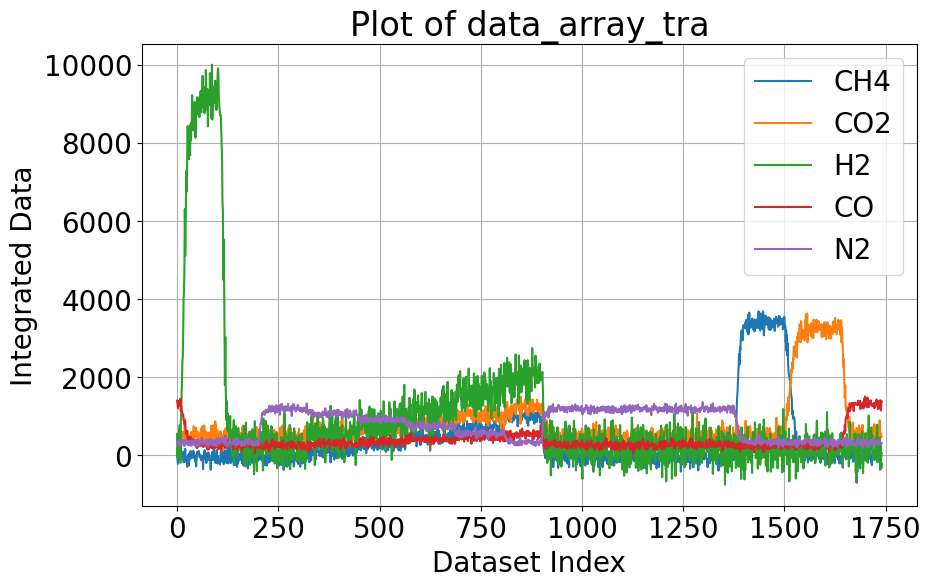

In [46]:
# Assuming data_array_tra and peak_name are defined

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot each peak's integrated data
for i in range(data_array_tra.shape[1]-2):
    plt.plot(data_array_tra[:, i], label=peak_name[i])

# Add labels and title
plt.xlabel("Dataset Index")
plt.ylabel("Integrated Data")
plt.title("Plot of data_array_tra")

# Add legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

# B. PLOT RAW (date)

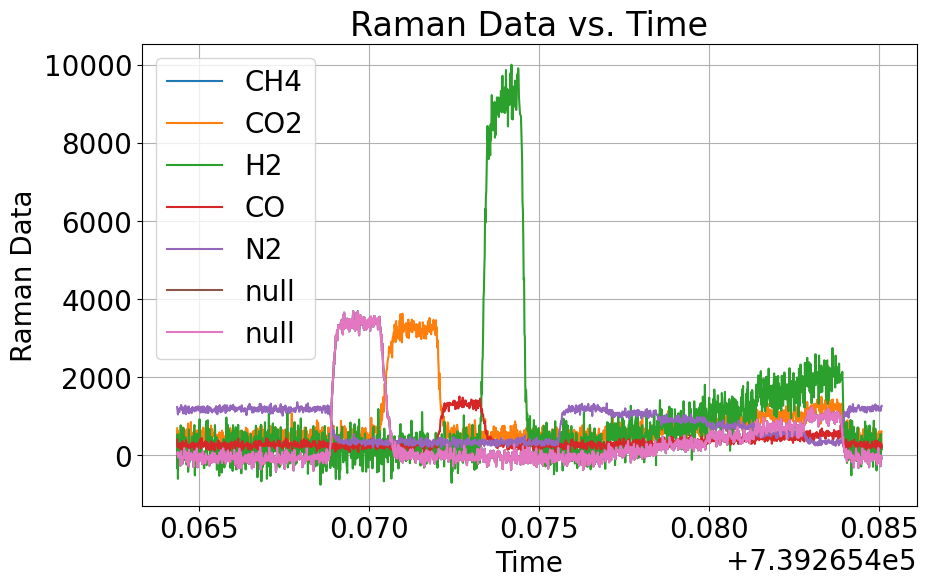

In [43]:
# Assuming raman_time is a NumPy array with shape (n_samples, n_features + 1)
# where the first column is the time and the remaining columns are the features

# Extract time and Raman data
time = raman_time[:, 0]  # First column is time
raman_data = raman_time[:, 1:]  # Remaining columns are Raman data

# Create a figure and axes
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot each Raman feature against time
for i in range(raman_data.shape[1]):
    plt.plot(time, raman_data[:, i], label=peak_name[i])

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Raman Data")
plt.title("Raman Data vs. Time")

# Add legend
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

# C. PLOT RAW (time)

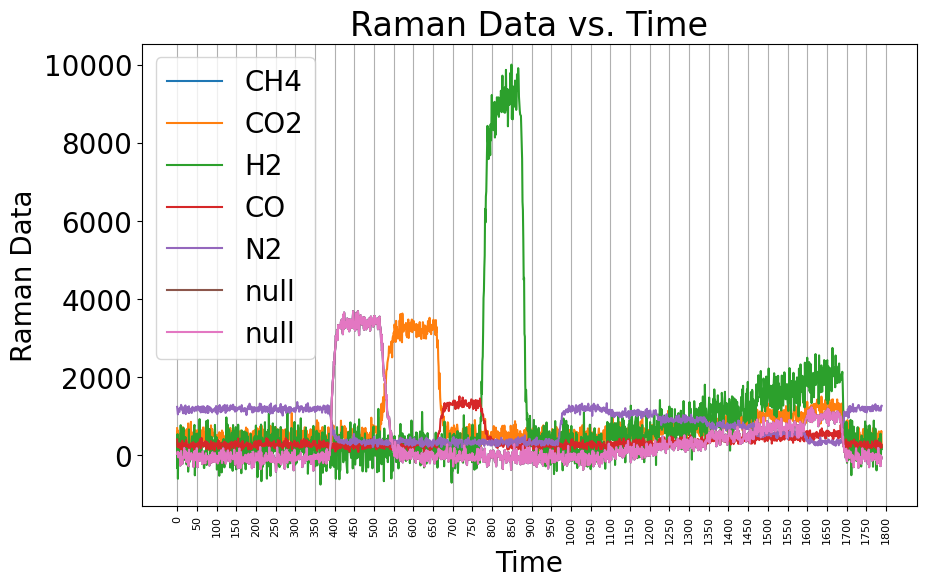

In [50]:
# Assuming raman_time is a NumPy array with shape (n_samples, n_features + 1)
# where the first column is the time and the remaining columns are the features

# Extract time and Raman data
time = raman_second[:, 0]  # First column is time
raman_data = raman_second[:, 1:]  # Remaining columns are Raman data

# Create a figure and axes
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot each Raman feature against time
for i in range(raman_data.shape[1]):
    plt.plot(time, raman_data[:, i], label=peak_name[i])

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Raman Data")
plt.title("Raman Data vs. Time")

# Add legend
plt.legend()

# Set x ticks and grid
x_ticks = np.arange(min(time), max(time)+50, 50) # Create ticks every 50 units
plt.xticks(x_ticks, rotation='vertical', fontsize=8) # Set the x ticks
plt.grid(True, which='both', axis='x') # Show gridlines for x-axis

# Show the plot
plt.show()

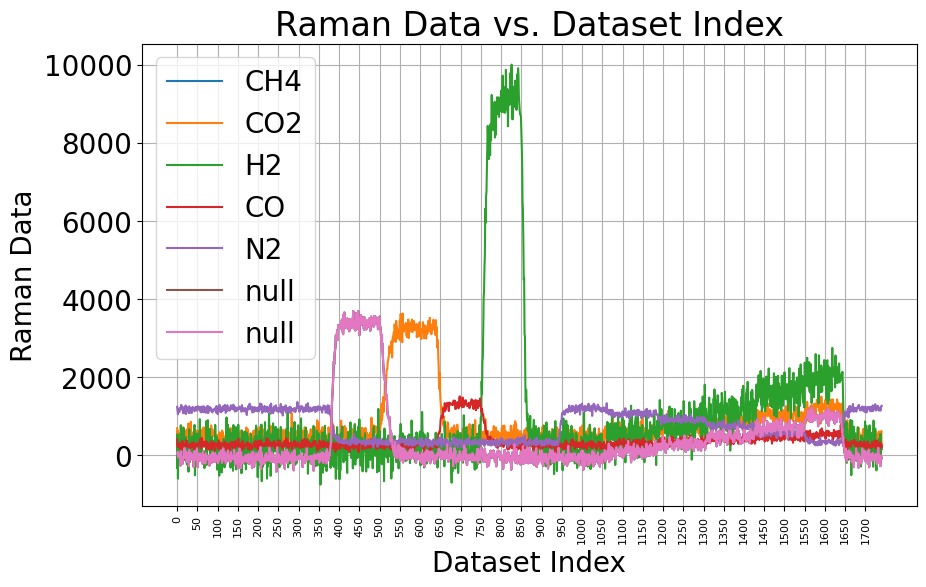

In [52]:
# Assuming raman_second and peak_name are defined

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Extract Raman data (excluding the first column which is time)
raman_data = raman_second[:, 1:]

# Plot each peak's data against dataset index
for i in range(raman_data.shape[1]):
    plt.plot(raman_data[:, i], label=peak_name[i])

# Add labels and title
plt.xlabel("Dataset Index")
plt.ylabel("Raman Data")
plt.title("Raman Data vs. Dataset Index")

# Add legend
plt.legend()

x_ticks = np.arange(0, raman_data.shape[0], 50)  # Ticks every 50 units
plt.xticks(x_ticks, rotation='vertical', fontsize=8)  # Vertical, smaller font
# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

# PEAK VIEW

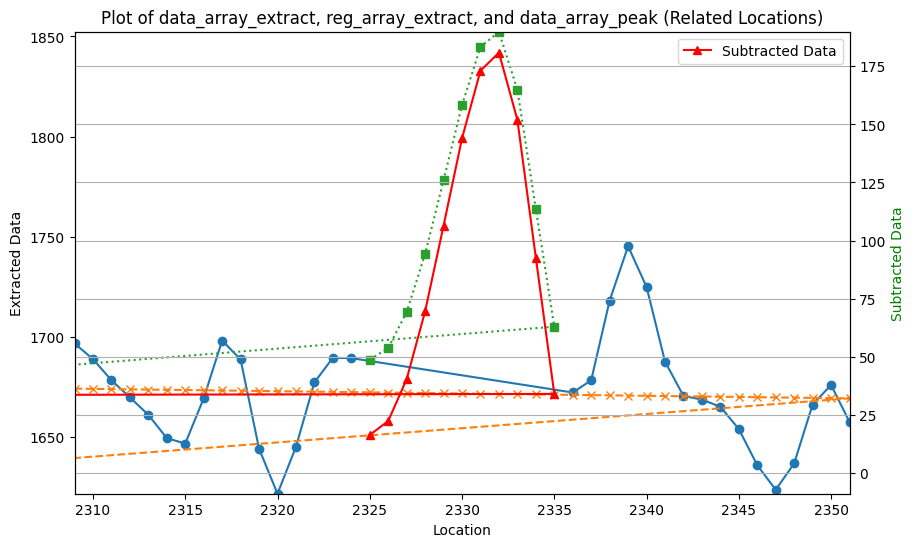

In [10]:
n_gas=4
n_sample=400
# Assuming data_array_extract, reg_array_extract, and data_array_peak are already defined

# Extract data for plotting
data_to_plot_raw = data_array_extract[n_sample, n_gas, :, :]
data_to_plot_reg = reg_array_extract[n_sample, n_gas, :, :]
data_to_plot_peak = data_array_peak[n_sample, n_gas, :, :]

# Extract x and y values for raw data
x_raw = data_to_plot_raw[:, 0]
y_raw = data_to_plot_raw[:, 1]

# Extract x and y values for regression data
x_reg = data_to_plot_reg[:, 0]
y_reg = data_to_plot_reg[:, 1]

# Extract x and y values for peak data
x_peak = data_to_plot_peak[:, 0]
y_peak = data_to_plot_peak[:, 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot raw data
plt.plot(x_raw, y_raw, marker='o', linestyle='-', label='Raw Data')

# Plot filtered regression data
#plt.plot(x_reg_filtered, y_reg_filtered, marker='x', linestyle='--', label='Regression Data')
plt.plot(x_reg, y_reg, marker='x', linestyle='--', label='Regression Data')
# Plot filtered peak data
#plt.plot(x_peak_filtered, y_peak_filtered, marker='s', linestyle=':', label='Peak Data')
plt.plot(x_peak, y_peak, marker='s', linestyle=':', label='Peak Data')


# Add labels and title
plt.xlabel("Location")
plt.ylabel("Extracted Data")
plt.title("Plot of data_array_extract, reg_array_extract, and data_array_peak (Related Locations)")
plt.xlim([np.min(x_raw), np.max(x_raw)])
# Find overall minimum and maximum y values (disregarding 0 for min_y)
min_y = min(np.min(y_raw[y_raw != 0]),
            np.min(y_reg[y_reg != 0]),
            np.min(y_peak[y_peak != 0]))
max_y = max(np.max(y_raw), np.max(y_reg), np.max(y_peak))

# Set y-axis limits
plt.ylim([min_y, max_y])

# Create a secondary y-axis on the right
ax2 = plt.gca().twinx()  # Get the current axes and create a twin axis

# Extract x and y values for data_array_sub
x_sub = data_array_sub[n_sample, n_gas, :, 0]
y_sub = data_array_sub[n_sample, n_gas, :, 1]

# Plot data_array_sub on the secondary y-axis
ax2.plot(x_sub, y_sub, marker='^', linestyle='-', color='red', label='Subtracted Data')

# Set label for the secondary y-axis
ax2.set_ylabel('Subtracted Data', color='green')

# Adjust x-axis limits if needed
# plt.xlim([min_value, max_value])

# Add grid for better visualization
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

# A. CALIBRATION (2 POINT, SINGLE)

In [ ]:
ex_raman_info=raman_info

cal_special_x=ex_raman_info[:,1:8]
cal_special_x=cal_special_x.T

cal_value_2=np.zeros((cal_special_x.shape[0],2))

for iii in range(cal_special_x.shape[0]):
  cal_value_2[iii,0], cal_value_2[iii,1] = fun_calibrate(cal_special_x[iii,:].reshape(-1, 1), cal_250205_y[iii,:].reshape(-1, 1))

print(cal_value_2)

# B. CALIBRATION (5 POINTS, MULTI)

In [ ]:
coeff_multi=np.zeros((raman_info.shape[1]-1,raman_info.shape[1]-1+1))
for iii in range(raman_info.shape[1]-1):
  temp_y=cal_250205_y[iii,:]
  temp_x=raman_info[:,1:8]
  coeff_multi[iii,:]=multiple_linear_regression(temp_y, temp_x)

print(coeff_multi)

# C. CALIBRATION (Dyna, 2 POINTS, MULTI)

In [48]:
coeff_multi=np.zeros((raman_info.shape[1]-1,raman_info.shape[1]-1+1))
temp_index_cal=np.array([])


for iii in range(raman_info.shape[1]-1):
  temp_y=cal_250221_250114[iii,:]
  temp_x=raman_info[:,1:8]
  coeff_multi[iii,:]=multiple_linear_regression(temp_y, temp_x)

print(coeff_multi)

ValueError: Found input variables with inconsistent numbers of samples: [1741, 5]

# A. USE CALIBRATION DATA (2 POINTS, SINGLE)

In [ ]:
us_raman_info=raman_info
#raman_label=np.array(us_raman_info.shape)
#raman_label[:,0]=us_raman_info[:,0]
res_val_us=np.zeros(us_raman_info.shape)
for iii in range(us_raman_info.shape[0]):
  for jjj in range (1,us_raman_info.shape[1]):

    #res_val_time[iii,jjj]=cal_value[jjj-1,0]+raman_time[iii,jjj]*cal_value[jjj-1,1]
    res_val_us[iii,jjj]=cal_value_2[jjj-1,0]+us_raman_info[iii,jjj]*cal_value_2[jjj-1,1]
print(res_val_us)

# B. USE CALIBRATION DATA (5 POINTS, MULTI)

In [34]:
res_val_time=np.zeros(raman_time.shape)
res_val_info=np.zeros(raman_time.shape)

res_val_time[:,0]=raman_time[:,0]

for iii in range(raman_time.shape[0]):
  for jjj in range (1,raman_time.shape[1]):
    res_val_time[iii,jjj]=predict_y_data(coeff_multi[jjj-1,:], raman_time[iii,1:8])


res_val_info = np.column_stack((raman_info[:,0], res_val_time[:,1:8]))

# DISPLAY DATA (TIME)

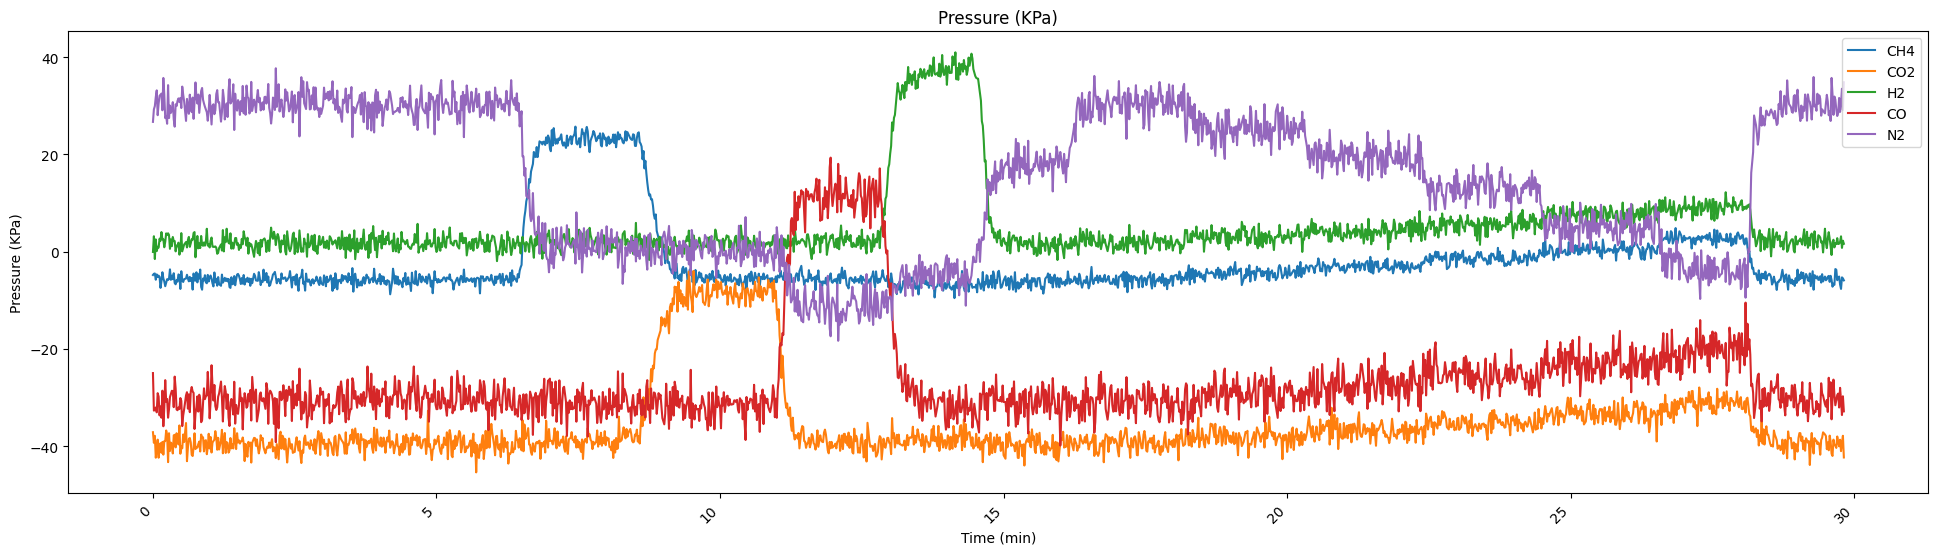

In [35]:
x_t = res_val_time[:, 0]
x=np.zeros(x_t.shape)
for iii in range(1,x_t.shape[0]):
  x[iii]=(x_t[iii]-x_t[0])*24*60

plt.figure(figsize=(24, 6))
for iii in range(1, res_val_time.shape[1]-2):  # Start from index 1 to skip the time column
    plt.plot(x, res_val_time[:, iii], label=peak_name[iii-1])

# Add labels and title

plt.xlabel('Time (min)')
plt.ylabel('Pressure (KPa)')
plt.title('Pressure (KPa)')
#plt.ylim(bottom=0)
#plt.ylim(top=150)
# Add a legend
plt.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

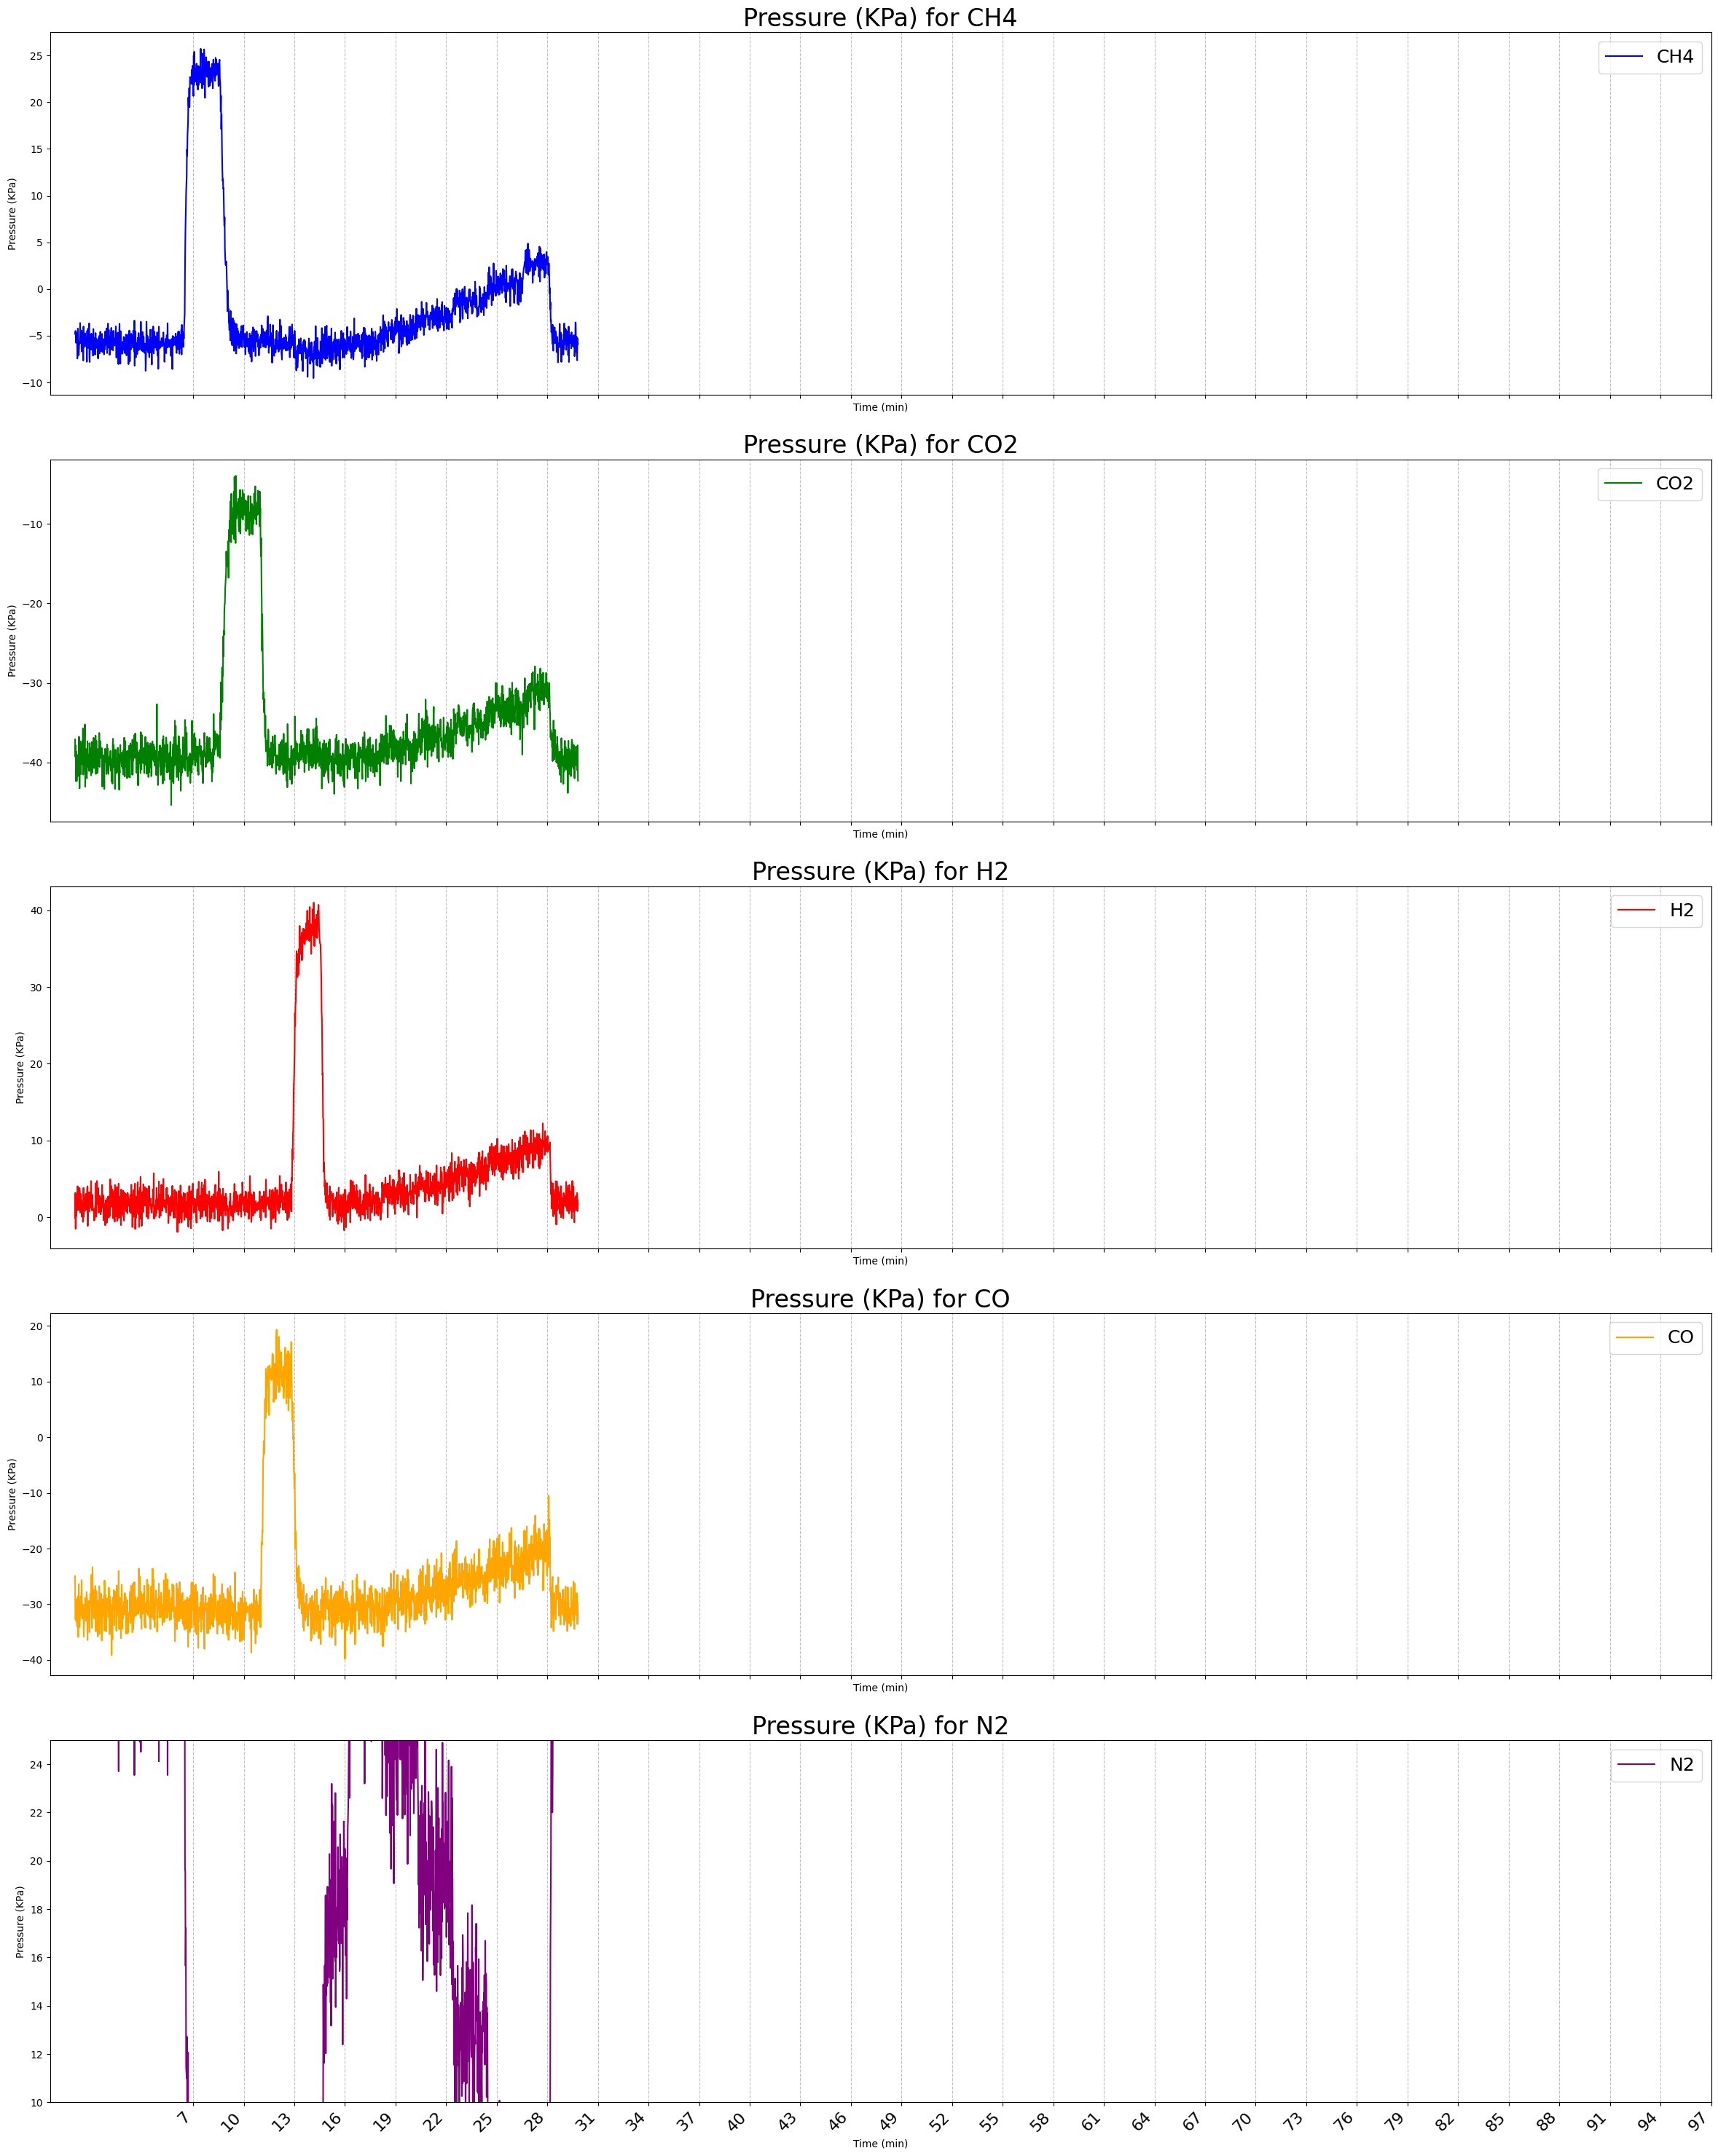

In [36]:

# ... (rest of your code) ...

x_ticks = np.arange(7, 100, 3)

x_t = res_val_time[:, 0]
x=np.zeros(x_t.shape)
for iii in range(1,x_t.shape[0]):
  x[iii]=(x_t[iii]-x_t[0])*24*60


fig, axs = plt.subplots(5, 1, figsize=(24, 30), sharex=True)
axs = axs.flatten()

# Define a list of colors for the lines
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Set default font size for the plot
plt.rcParams.update({'font.size': 20})  # Double the default size (usually 10)

for iii in range(1, res_val_time.shape[1] - 2):
    subplot_index = iii - 1

    # Plot using the specified color
    axs[subplot_index].plot(x, res_val_time[:, iii], label=peak_name[iii - 1], color=colors[subplot_index])

    axs[subplot_index].set_xlabel('Time (min)')
    axs[subplot_index].set_ylabel('Pressure (KPa)')
    axs[subplot_index].set_title(f'Pressure (KPa) for {peak_name[iii - 1]}')
    axs[subplot_index].legend(fontsize=18)
    axs[subplot_index].grid(axis='x', which='major', linestyle='--', color='gray', alpha=0.5)
    axs[subplot_index].set_xticks(x_ticks)
    #axs[subplot_index].set_xlim([0, 66000])
     # Set y-axis limits
    if subplot_index==4:
      axs[subplot_index].set_ylim([10, 25])

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.tight_layout()
plt.show()

# DISPLAY DATA (CAT)

In [12]:
x = raman_info[:, 0]
plt.figure(figsize=(24, 6))
for iii in range(1, res_val_info.shape[1]):  # Start from index 1 to skip the time column
    plt.plot(x, res_val_info[:, iii], label=peak_name[iii-1])

# Add labels and title

plt.xlabel('Time')
plt.ylabel('Flowrate')
plt.title('Flowrate')
#plt.ylim(bottom=0)
#plt.ylim(top=150)
# Add a legend
plt.legend()

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'res_val_info' is not defined

<Figure size 2400x600 with 0 Axes>

# PROCESSING DATA DIFFERENTIATION

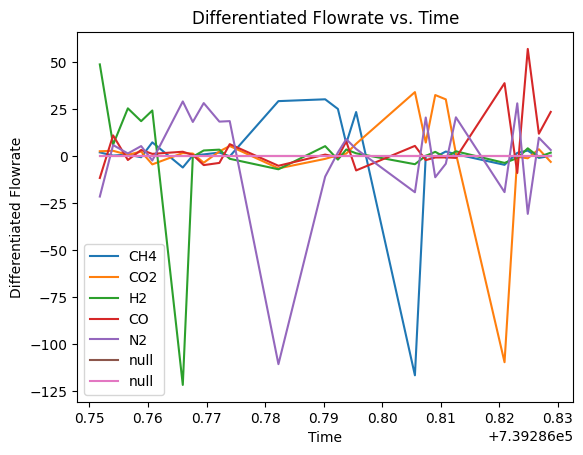

In [ ]:
diff_res_time = np.diff(res_val_time, axis=0)  # Differentiate along the time axis (axis=0)

# Adjust the time data to match the differentiated data
diff_x = res_val_time[1:, 0]  # Time data for the differentiated data (shifted by one)

# Plot the differentiated data
for iii in range(1, diff_res_time.shape[1]):
    plt.plot(diff_x, diff_res_time[:, iii], label=peak_name[iii - 1])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Differentiated Flowrate')
plt.title('Differentiated Flowrate vs. Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# DISPLAY DATA